## Qiskit Visualizations / Qiskit Визуализация

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

## Plot histogram / Построить гистограмму

To visualize the data from a quantum circuit run on a real device or qasm_simulator we have made a simple function plot_histogram(data).
As an example we make a 2-qubit Bell state.

Чтобы визуализировать данные из квантовой схемы, запущенной на реальном устройстве или qasm_simulator, мы сделали простую функцию plot_histogram(data).
В качестве примера сделаем 2-кубитное состояние Белла.

In [2]:
# quantum circuit to make a Bell state
# квантовая схема для создания состояния Белла
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
# выполняем квантовую схему
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell + meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 507, '11': 493}


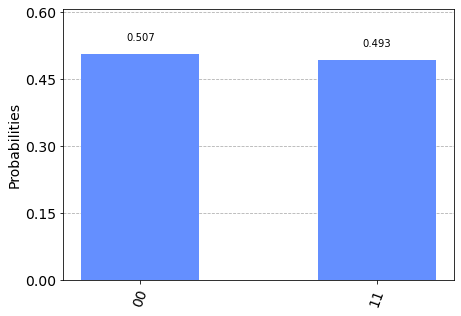

In [3]:
plot_histogram(counts)

 ## Options when plotting a histogram / Параметры при построении гистограммы

The plot_histogram() has a few options to adjust the output graph. The first option is the legend kwarg. This is used to provide a label for the executions. It takes a list of strings use to label each execution’s results. This is mostly useful when plotting multiple execution results in the same histogram. The sort kwarg is used to adjust the order the bars in the histogram are rendered. It can be set to either ascending order with asc or descending order with dsc. The number_to_keep kwarg takes an integer for the number of terms to show, the rest are grouped together in a single bar called rest. You can adjust the color of the bars with the color kwarg which either takes a string or a list of strings for the colors to use for the bars for each execution. You can adjust whether labels are printed above the bars or not with the bar_labels kwarg. The last option available is the figsize kwarg which takes a tuple of the size in inches to make the output figure.

Plot_histogram () имеет несколько опций для настройки выходного графика. Первый вариант - легенда kwarg. Это используется для обозначения казней. Требуется список строк, используемых для обозначения результатов каждого выполнения. Это в основном полезно при отображении нескольких результатов выполнения на одной и той же гистограмме. Параметр sort kwarg используется для настройки порядка отображения полос на гистограмме. Может быть установлен либо в порядке возрастания с помощью asc, либо в порядке убывания с помощью dsc. Number_to_keep kwarg принимает целое число для количества отображаемых терминов, остальные сгруппированы вместе в одной панели под названием rest. Вы можете настроить цвет полосок с помощью цвета kwarg, который принимает либо строку, либо список строк для цветов, используемых для полос при каждом выполнении. Вы можете настроить, будут ли этикетки печататься над полосами или нет, с помощью kwarg bar_labels. Последний доступный вариант - это figsize kwarg, который берет кортеж размером в дюймах, чтобы получить выходную фигуру.

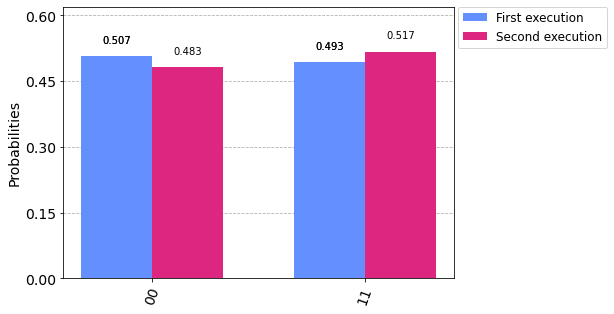

In [4]:
# Execute 2-qubit Bell state again
# Выполнить 2-кубитное состояние Bell снова
second_result = execute(circ, backend, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
# Постройте результаты с легендой
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

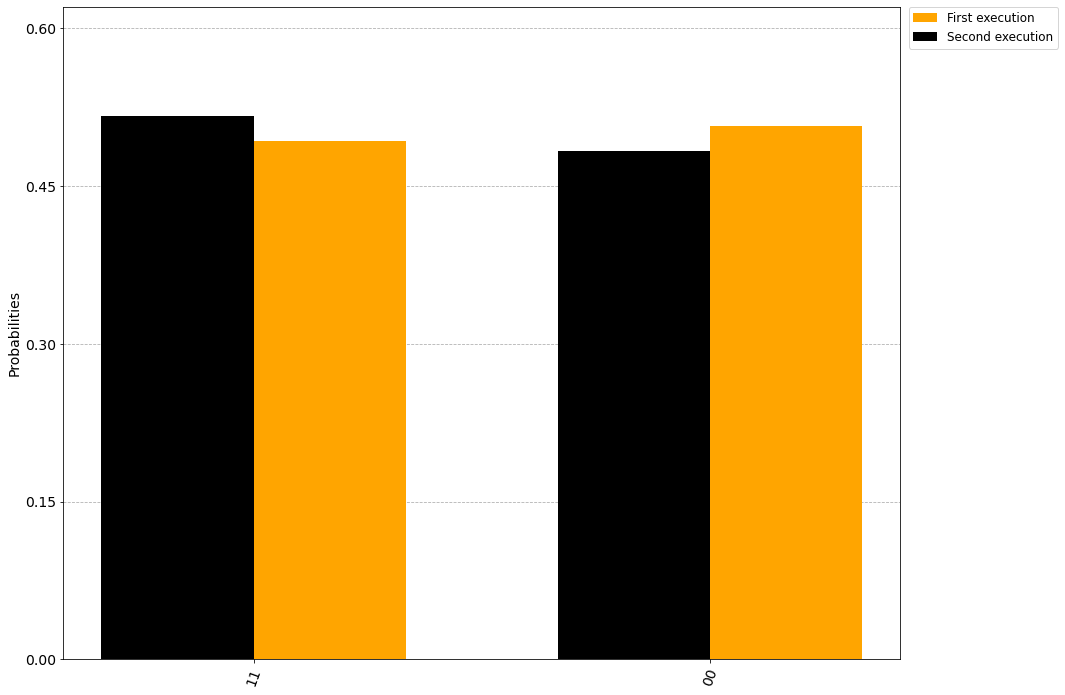

In [5]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange', 'black'], bar_labels=False)

## Using the output from plot_histogram() / Использование вывода plot_histogram ()

When using the plot_histogram() function it returns a matplotlib.Figure for the rendered visualization. Jupyter notebooks understand this return type and render it for us in this tutorial, but when running outside of Jupyter you do not have this feature automatically. However, the matplotlib.Figure class natively has methods to both display and save the visualization. You can call .show() on the returned object from plot_histogram() to open the image in a new window (assuming your configured matplotlib backend is interactive). Or alternatively you can call .savefig('out.png') to save the figure to out.png. The savefig() method takes a path so you can adjust the location and filename where you’re saving the output.

При использовании функции plot_histogram () она возвращает matplotlib.Figure для визуализированной визуализации. Блокноты Jupyter понимают этот возвращаемый тип и отображают его для нас в этом руководстве, но при работе вне Jupyter у вас нет этой функции автоматически. Однако класс matplotlib.Figure изначально имеет методы для отображения и сохранения визуализации. Вы можете вызвать .show () для возвращенного объекта из plot_histogram (), чтобы открыть изображение в новом окне (при условии, что ваш настроенный бэкэнд matplotlib интерактивен). Или же вы можете вызвать .savefig ('out.png'), чтобы сохранить рисунок в out.png. Метод savefig () задает путь, чтобы вы могли настроить местоположение и имя файла, в котором вы сохраняете результат.

## Plot State / Диаграмма состояний

In many situations you want to see the state of a quantum computer. This could be for debugging. Here we assume you have this state (either from simulation or state tomography) and the goal is to visualize the quantum state. This requires exponential resources, so we advise to only view the state of small quantum systems. There are several functions for generating different types of visualization of a quantum state:

- plot_state_city(quantum_state)
- plot_state_qsphere(quantum_state)
- plot_state_paulivec(quantum_state)
- plot_state_hinton(quantum_state)
- plot_bloch_multivector(quantum_state)

Во многих ситуациях вы хотите увидеть состояние квантового компьютера. Это могло быть для отладки. Здесь мы предполагаем, что у вас есть это состояние (либо из моделирования, либо из томографии состояний), и цель состоит в том, чтобы визуализировать квантовое состояние. Для этого требуются экспоненциальные ресурсы, поэтому мы советуем просматривать состояние только небольших квантовых систем. Есть несколько функций для генерации различных типов визуализации квантового состояния.

- plot_state_city(quantum_state)
- plot_state_qsphere(quantum_state)
- plot_state_paulivec(quantum_state)
- plot_state_hinton(quantum_state)
- plot_bloch_multivector(quantum_state)

A quantum state is either a state matrix  ρ (Hermitian matrix) or statevector |ψ⟩ (complex vector). The state matrix is related to the statevector by
$\rho = |\psi\rangle\langle \psi|$ ,

and is more general as it can represent mixed states (positive sum of statevectors)

$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |$ .

The visualizations generated by the functions are:
- plot_state_city(quantum_state)
- plot_state_qsphere(quantum_state)
- plot_state_paulivec(quantum_state)
- plot_state_hinton(quantum_state)
- plot_bloch_multivector(quantum_state)

Квантовое состояние - это либо матрица состояний ρ (эрмитова матрица), либо вектор состояний | ψ⟩ (комплексный вектор). Матрица состояний связана с вектором состояний соотношением

$\rho = |\psi\rangle\langle \psi|$ ,

и является более общим, поскольку может представлять смешанные состояния (положительная сумма векторов состояний)

$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |$ .

Визуализации, создаваемые функциями:
- plot_state_city(quantum_state)
- plot_state_qsphere(quantum_state)
- plot_state_paulivec(quantum_state)
- plot_state_hinton(quantum_state)
- plot_bloch_multivector(quantum_state)

In [7]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [8]:
# execute the quantum circuit
# выполняем квантовую схему
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

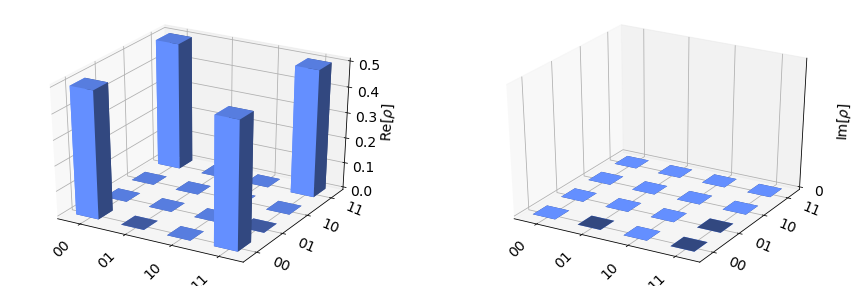

In [9]:
plot_state_city(psi)

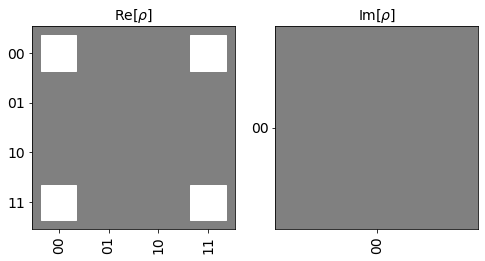

In [10]:
plot_state_hinton(psi)

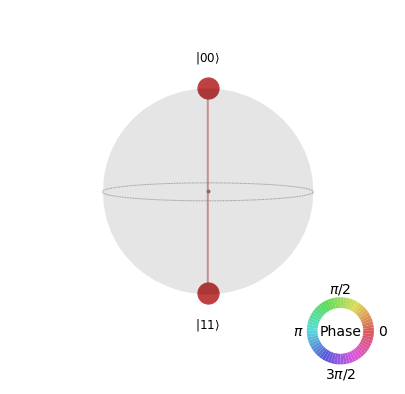

In [12]:
plot_state_qsphere(psi)

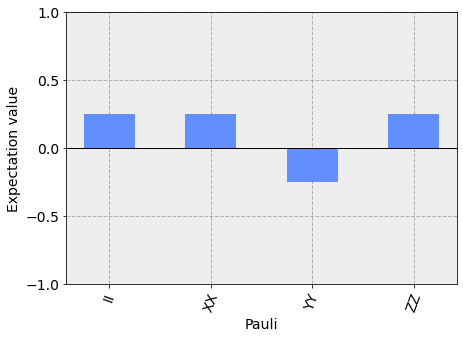

In [13]:
plot_state_paulivec(psi)

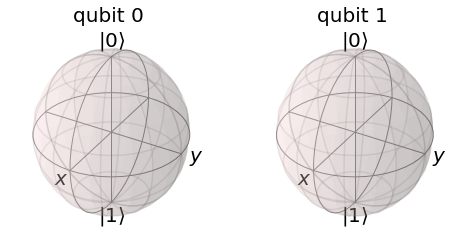

In [14]:
plot_bloch_multivector(psi)

Here we see that there is no information about the quantum state in the single qubit space as all vectors are zero.

Здесь мы видим, что нет информации о квантовом состоянии в пространстве одиночных кубитов, поскольку все векторы равны нулю.

## Options when using state plotting functions / Параметры при использовании функций построения графиков состояний

The various functions for plotting quantum states provide a number of options to adjust how the plots are rendered. Which options are available depends on the function being used.

plot_state_city() options

- title (str): a string that represents the plot title
- figsize (tuple): figure size in inches (width, height).
- color (list): a list of len=2 giving colors for real and imaginary components of matrix elements.
    
Различные функции построения графиков квантовых состояний предоставляют ряд опций для настройки отображения графиков. Доступные параметры зависят от используемой функции.

параметры plot_state_city ()

- title (str): строка, представляющая заголовок сюжета
- figsize (tuple): размер рисунка в дюймах (ширина, высота).
- color (list): список len = 2, задающий цвета для реальных и мнимых компонентов элементов матрицы.   

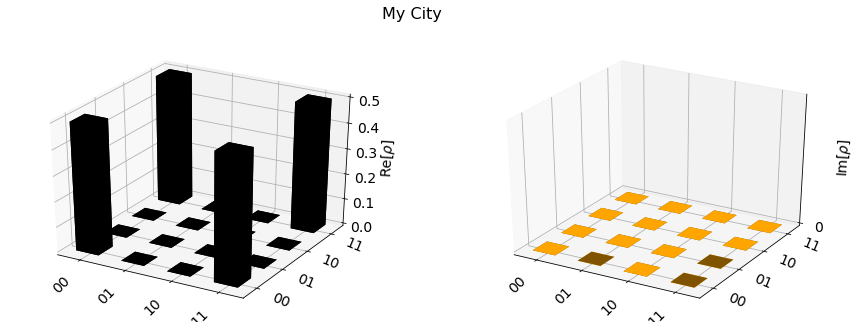

In [15]:
plot_state_city(psi, title="My City", color=['black', 'orange'])

plot_state_hinton() options

- title (str): a string that represents the plot title
- figsize (tuple): figure size in inches (width, height).
    
параметры plot_state_hinton() ()

- title (str): строка, представляющая заголовок сюжета
- figsize (tuple): размер рисунка в дюймах (ширина, высота).

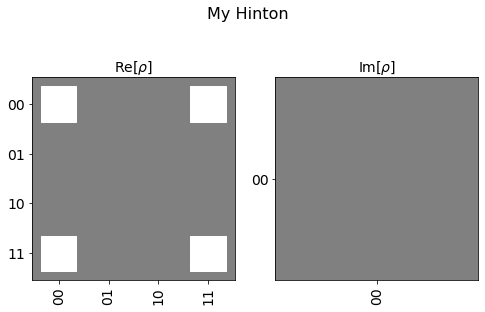

In [16]:
plot_state_hinton(psi, title="My Hinton")

plot_state_paulivec() options

- title (str): a string that represents the plot title
- figsize (tuple): figure size in inches (width, height).
- color (list or str): color of the expectation value bars.

параметры plot_state_paulivec ()

- title (str): строка, представляющая заголовок сюжета
- figsize (tuple): размер рисунка в дюймах (ширина, высота).
- color (list или str): цвет полосок математического ожидания.
    

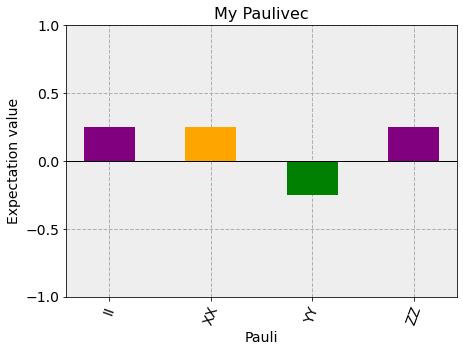

In [17]:
plot_state_paulivec(psi, title="My Paulivec", color=['purple', 'orange', 'green'])

plot_state_qsphere() options
- figsize (tuple): figure size in inches (width, height).

plot_bloch_multivector() options
- title (str): a string that represents the plot title
- figsize (tuple): figure size in inches (width, height).
    
параметры plot_state_qsphere ()
- figsize (tuple): размер рисунка в дюймах (ширина, высота).

параметры plot_bloch_multivector ()
- title (str): строка, представляющая заголовок сюжета
- figsize (tuple): размер рисунка в дюймах (ширина, высота).

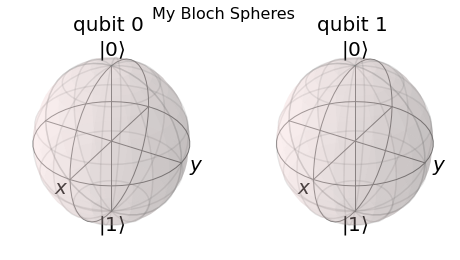

In [18]:
plot_bloch_multivector(psi, title="My Bloch Spheres")

## Using the output from state plotting functions / Использование выходных данных функций построения графиков состояний

When using any of the state plotting functions it returns a matplotlib.Figure for the rendered visualization. Jupyter notebooks understand this return type and render it for us in this tutorial, but when running outside of Jupyter you do not have this feature automatically. However, the matplotlib.Figure class natively has methods to both display and save the visualization. You can call .show() on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive). Or alternatively you can call .savefig('out.png') to save the figure to out.png in the current working directory. The savefig() method takes a path so you can adjust the location and filename where you’re saving the output.

При использовании любой из функций построения графика состояния он возвращает matplotlib.Figure для визуализированной визуализации. Блокноты Jupyter понимают этот возвращаемый тип и отображают его для нас в этом руководстве, но при работе вне Jupyter у вас нет этой функции автоматически. Однако класс matplotlib.Figure изначально имеет методы для отображения и сохранения визуализации. Вы можете вызвать .show () для возвращенного объекта, чтобы открыть изображение в новом окне (при условии, что ваш настроенный бэкэнд matplotlib является интерактивным). Или же вы можете вызвать .savefig ('out.png'), чтобы сохранить рисунок в out.png в текущем рабочем каталоге. Метод savefig () задает путь, чтобы вы могли настроить местоположение и имя файла, в котором вы сохраняете результат.

## Interactive State Plots for Jupyter Notebooks / Интерактивные графики состояний для ноутбуков Jupyter

Just like with plot_histogram() there is a second set of functions for each of the functions to plot the quantum state. These functions have the same name but with a prepended i:
- plot_state_city(quantum_state)
- plot_state_qsphere(quantum_state)
- plot_state_paulivec(quantum_state)
- plot_state_hinton(quantum_state)
- plot_bloch_multivector(quantum_state)
These functions are made using an externally hosted JS library for use in Jupyter notebooks. The interactive plot can only be used if you’re running inside a Jupyter notebook and only if you have external connectivity to the host with the JS library. If you use these functions outside of a Jupyter notebook it will fail.

Как и в случае с plot_histogram (), для каждой функции есть второй набор функций для построения квантового состояния. У этих функций то же имя, но с добавлением i:
- plot_state_city(quantum_state)
- plot_state_qsphere(quantum_state)
- plot_state_paulivec(quantum_state)
- plot_state_hinton(quantum_state)
- plot_bloch_multivector(quantum_state)
Эти функции выполняются с использованием внешней библиотеки JS для использования в записных книжках Jupyter. Интерактивный график можно использовать только в том случае, если вы работаете в записной книжке Jupyter и только при наличии внешнего подключения к хосту с помощью библиотеки JS. Если вы используете эти функции за пределами записной книжки Jupyter, это не сработает.

In [20]:
from qiskit.tools.visualization import iplot_state_paulivec

<ipython-input-21-65862d70e7b0>:3: DeprecationWarning: The iplot_state_paulivec function is deprecated and will be removed in a future release. The hosted code this depended on no longer exists so this is falling back to use the matplotlib visualizations. qiskit.visualization.plot_state_paulivec should be used directly moving forward.
  iplot_state_paulivec(psi)


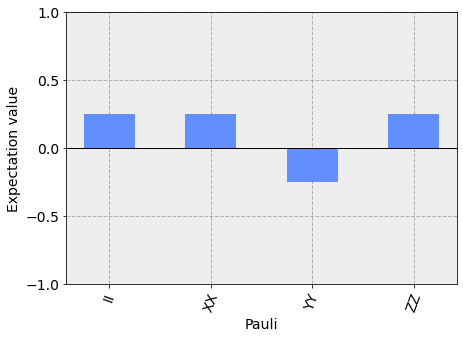

In [21]:
# Generate an interactive pauli vector plot
# Создать интерактивный векторный график Паули
iplot_state_paulivec(psi)

In [22]:
## Plot Bloch Vector / Постройте вектор Блоха

A standard way of plotting a quantum system is using the Bloch vector. This only works for a single qubit and takes as input the Bloch vector.
The Bloch vector is defined as [𝑥=Tr[𝑋𝜌],𝑦=Tr[𝑌𝜌],𝑧=Tr[𝑍𝜌]]

$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |$.
, where 𝑋, 𝑌, and 𝑍 are the Pauli operators for a single qubit and ρ is the state matrix.

Стандартный способ построения квантовой системы - использовать вектор Блоха. Это работает только для одного кубита и принимает в качестве входных данных вектор Блоха.
Вектор Блоха определяется как 
[𝑥 = Tr [𝑋𝜌], 𝑦 = Tr [𝑌𝜌], 𝑧 = Tr [𝑍𝜌]]


$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |$.
, где 𝑋, 𝑌 и 𝑍 - операторы Паули для одного кубита, а ρ - матрица состояний.

In [23]:
from qiskit.visualization import plot_bloch_vector

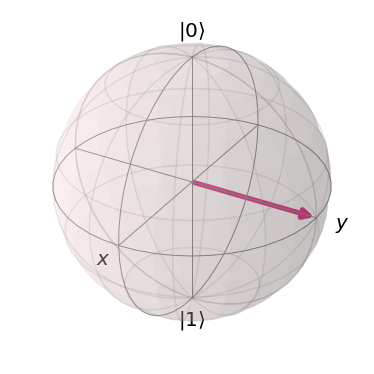

In [24]:
plot_bloch_vector([0,1,0])

Options for plot_bloch_vector()

- title (str): a string that represents the plot title
- figsize (tuple): Figure size in inches (width, height).
    
Параметры для plot_bloch_vector ()

- title (str): строка, представляющая заголовок сюжета
- figsize (tuple): размер рисунка в дюймах (ширина, высота).    

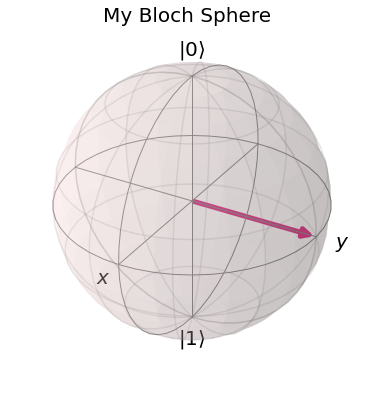

In [25]:
plot_bloch_vector([0,1,0], title='My Bloch Sphere')

In [ ]:
Adjusting the output from plot_bloch_vector()
When using the plot_bloch_vector function it returns a matplotlib.Figure for the rendered visualization. Jupyter notebooks understand this return type and render it for us in this tutorial, but when running outside of Jupyter you do not have this feature automatically. However, the matplotlib.Figure class natively has methods to both display and save the visualization. You can call .show() on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive). Or alternatively you can call .savefig('out.png') to save the figure to out.png in the current working directory. The savefig() method takes a path so you can adjust the location and filename where you’re saving the output.

